In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS =3
EPOCHS= 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "plant village1",
    shuffle=True,
    
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 9191 files belonging to 15 classes.


In [4]:
classnames = dataset.class_names
classnames

['Corn__common_rust',
 'Corn__gray_leaf_spot',
 'Corn__healthy',
 'Corn__northern_leaf_blight',
 'Mango__diseased',
 'Mango__healthy',
 'Sugarcane__bacterial_blight',
 'Sugarcane__healthy',
 'Sugarcane__red_rot',
 'Sugarcane__red_stripe',
 'Sugarcane__rust',
 'Wheat__brown_rust',
 'Wheat__healthy',
 'Wheat__septoria',
 'Wheat__yellow_rust']

In [5]:
len(dataset)

288

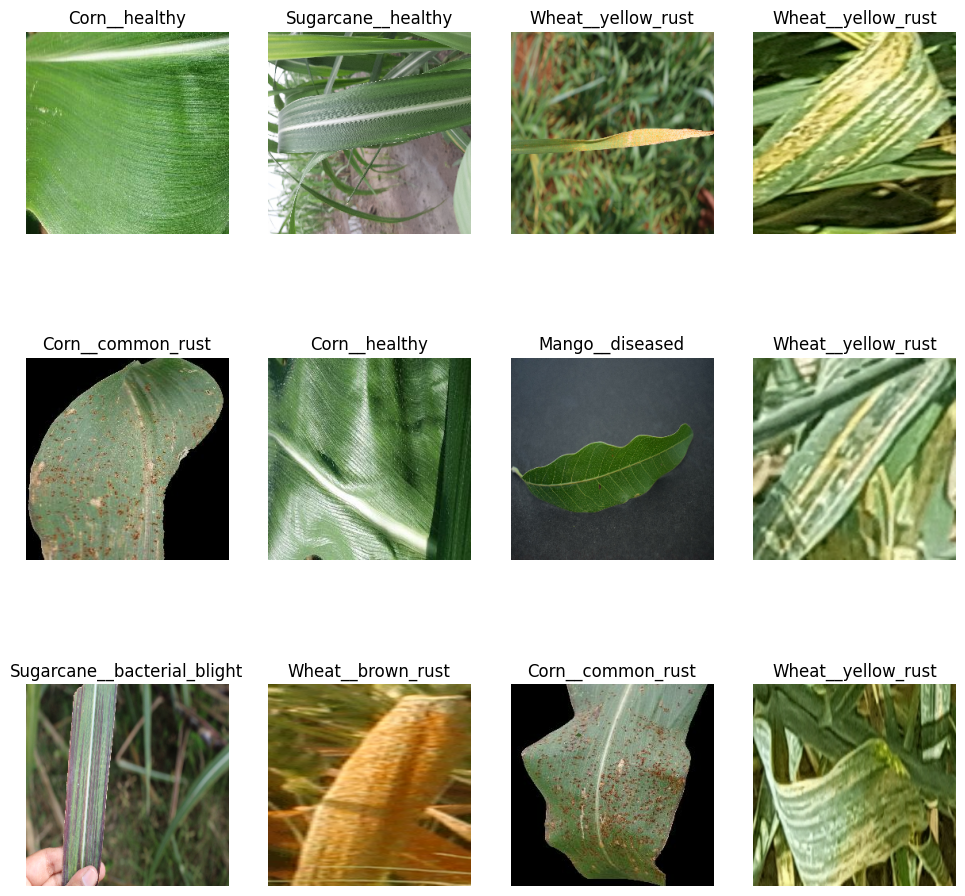

In [6]:
plt.figure(figsize=(12,12))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(classnames[label_batch[i]])
        plt.axis("off")

In [7]:
len(dataset)

288

In [8]:
# 80% ==> training
# 20% ==> 10% validation, 10% test

In [9]:
train_size = 0.8
len(dataset)*train_size

230.4

In [29]:
train_ds = dataset.take(230)
len(train_ds)

230

In [30]:
test_ds = dataset.skip(230)
len(test_ds)

58

In [31]:
val_size = 0.1
len(dataset)*val_size

28.8

In [32]:
val_size = test_ds.take(28)
len(val_size)

28

In [33]:
test_ds = test_ds.skip(28)
len(test_ds)

30

In [15]:
def get_dataset_paritions_tf (ds,train_split = 0.8,val_split = 0.1, test_split = 0.1,shuffle=True,shuffle_size=10000):

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)

    train_size = int(train_split* ds_size)
    val_size = int(val_split*ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds

In [16]:
train_ds,val_ds,test_ds = get_dataset_paritions_tf(dataset)

In [17]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [18]:
len(train_ds)

230

In [19]:
len(val_ds)

28

In [20]:
len(test_ds)

30

In [21]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [22]:
resize_and_rescale =tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE , IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [23]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [24]:
input_shape = (BATCH_SIZE , IMAGE_SIZE , IMAGE_SIZE , CHANNELS)
n_classes =15 #five catergories

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32 , (4,4), activation = 'relu', input_shape = input_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(145 ,(4,4), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(145,(4,4), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(145 ,(4,4), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(145 ,(4,4), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(145 ,(4,4), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(145, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape=input_shape)

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 253, 253, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (32, 126, 126, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 123, 123, 145)       74385     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 61, 61, 145)         0         
 g2D)                                                 

In [26]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

In [34]:
history = model.fit(
    train_ds,
    batch_size = BATCH_SIZE,
    validation_data = val_ds,
    verbose =1,
    epochs = EPOCHS
)

Epoch 1/50
230/230 [==============================] - 628s 3s/step - loss: 1.6061 - accuracy: 0.4410 - val_loss: 1.4037 - val_accuracy: 0.5871
Epoch 2/50
230/230 [==============================] - 599s 3s/step - loss: 1.1042 - accuracy: 0.6417 - val_loss: 1.0037 - val_accuracy: 0.6574
Epoch 3/50
230/230 [==============================] - 647s 3s/step - loss: 0.9236 - accuracy: 0.6906 - val_loss: 0.7867 - val_accuracy: 0.7377
Epoch 4/50
230/230 [==============================] - 643s 3s/step - loss: 0.8308 - accuracy: 0.7302 - val_loss: 0.6308 - val_accuracy: 0.7891
Epoch 5/50
230/230 [==============================] - 653s 3s/step - loss: 0.7353 - accuracy: 0.7598 - val_loss: 0.7596 - val_accuracy: 0.7645
Epoch 6/50
230/230 [==============================] - 669s 3s/step - loss: 0.6708 - accuracy: 0.7806 - val_loss: 0.5097 - val_accuracy: 0.8270
Epoch 7/50
230/230 [==============================] - 680s 3s/step - loss: 0.6067 - accuracy: 0.7996 - val_loss: 0.6587 - val_accuracy: 0.7958

In [35]:
scores = model.evaluate(test_ds)

30/30 [==============================] - 75s 570ms/step - loss: 0.2605 - accuracy: 0.9166


In [36]:
scores

[0.26047348976135254, 0.9165775179862976]

In [37]:
history

In [38]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 230}

In [39]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

first image to predict
actual label : Wheat__septoria
1/1 [==============================] - 2s 2s/step
predicyted label: Wheat__septoria


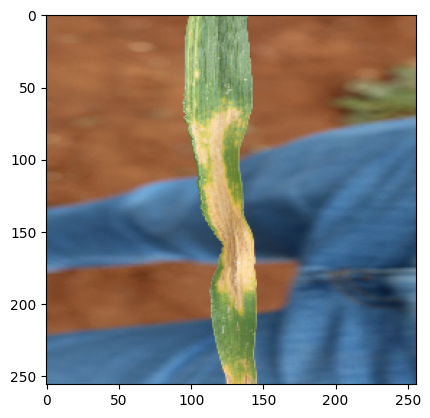

In [40]:
import numpy as np
for image_batch , label_batch in test_ds.take(1):

    first_image  = image_batch[0].numpy().astype('uint8')
    first_label  = label_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label :",classnames[first_label])

    batch_prediction = model.predict(image_batch)
    print("predicyted label:",classnames[np.argmax(batch_prediction[0])])

In [41]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)

    predictions = model.predict(img_array)

    predicted_class = classnames[np.argmax(predictions[0])]
    confidense = round(100*(np.max(predictions[0])),2)

    return predicted_class, confidense

1/1 [==============================] - 0s 50ms/step


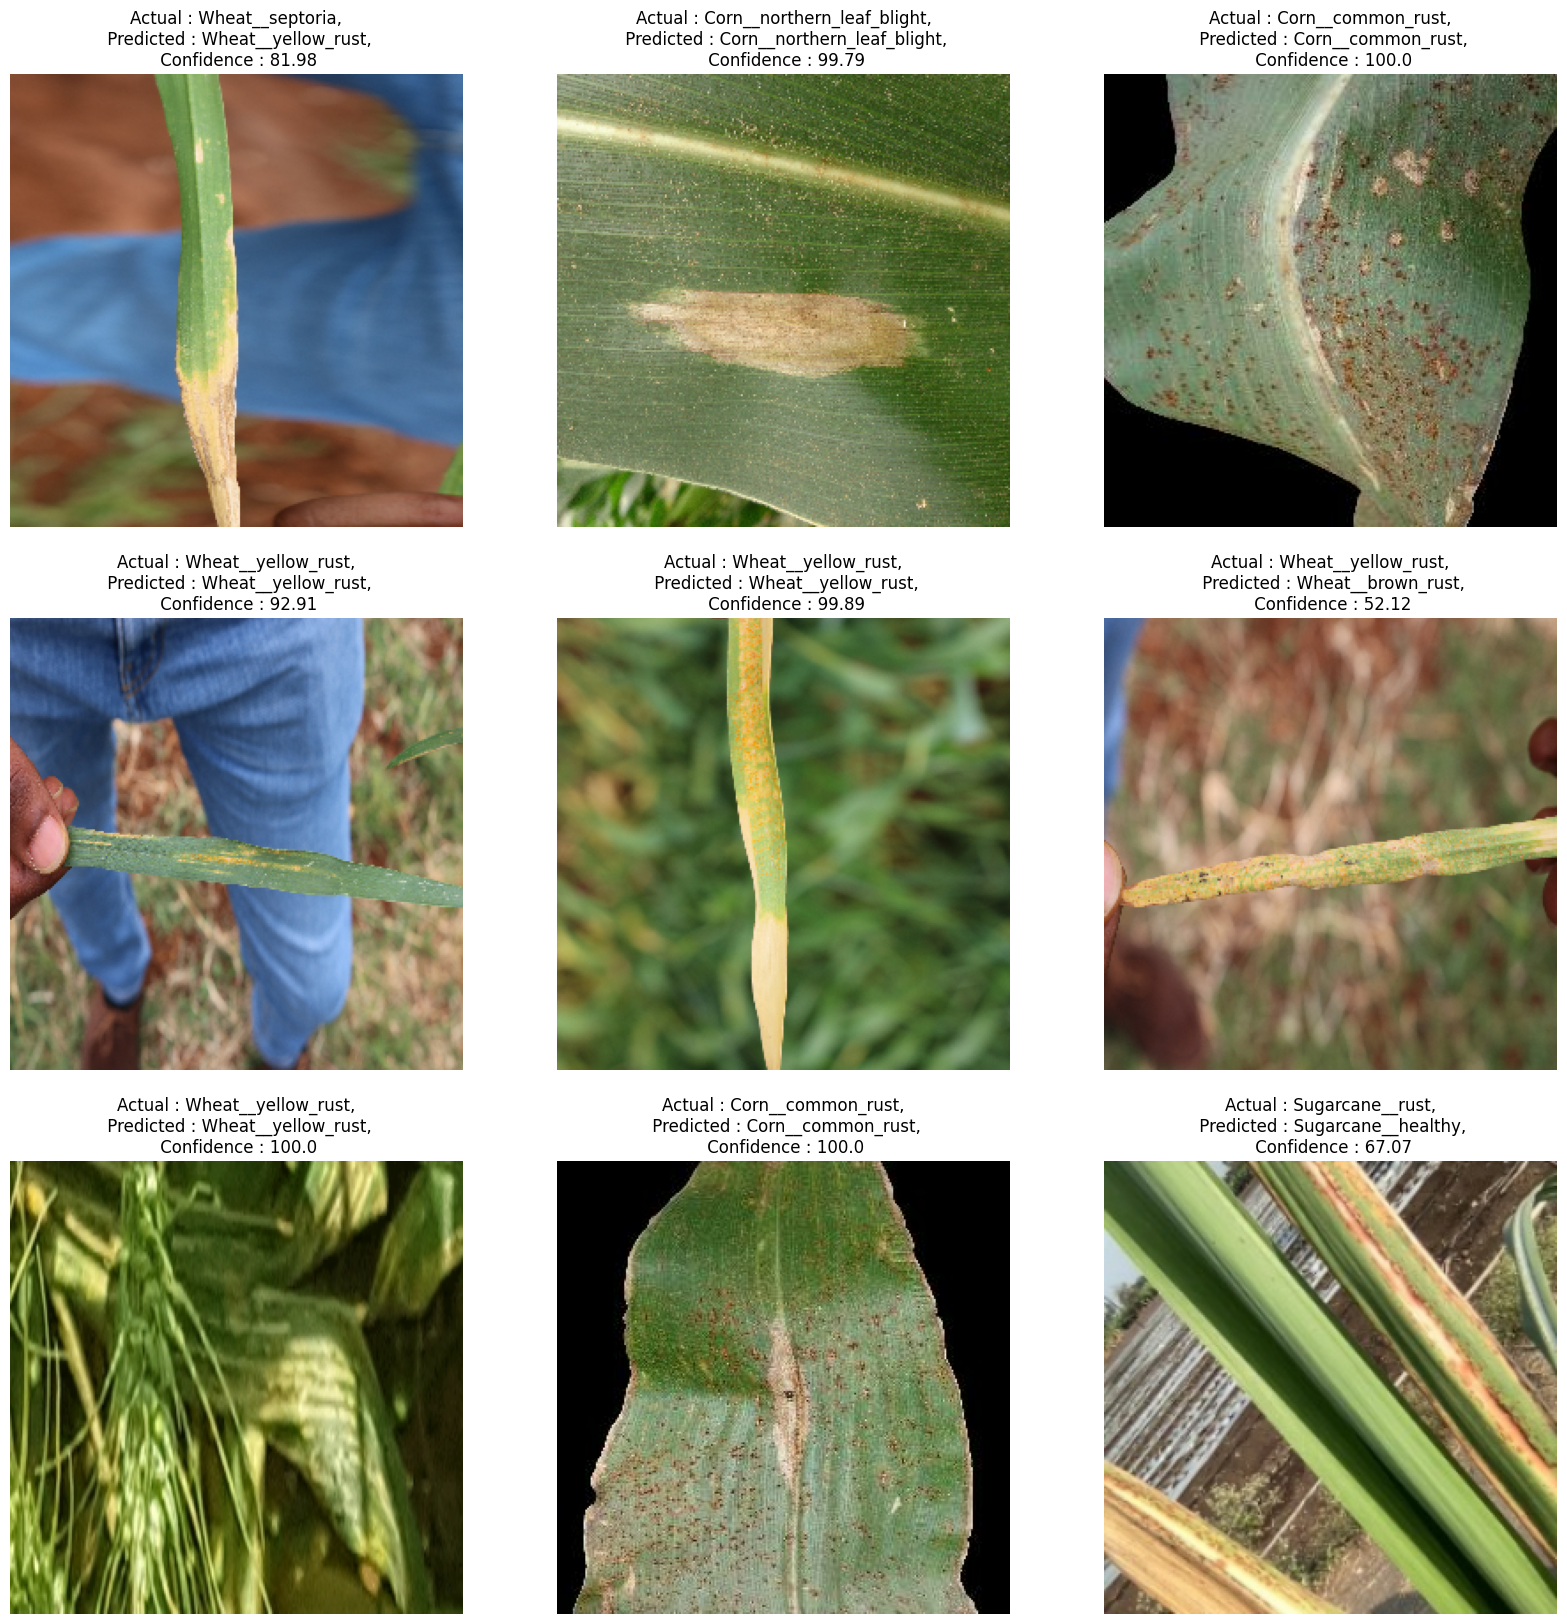

In [42]:
plt.figure(figsize=(20,20))

for images, labels in test_ds.take(1):
    for i in range(9):
        ax =plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))

        predicted_class , confidence = predict(model, images[i].numpy)
        actual_class = classnames[labels[i]]

        plt.title(f"Actual : {actual_class},\n Predicted : {predicted_class},\n Confidence : {confidence}")
        
        plt.axis("off")

In [43]:
import os

# Get the list of files in the directory
files = os.listdir("../saved_models")

# Filter out non-numeric filenames and convert the remaining ones to integers
model_versions = [int(i) for i in files if i.isdigit()]

# Determine the next model version
model_version = max(model_versions + [0]) + 1

# Save the model
model.save(f"../saved_models/{model_version}.h5")


c:\Users\riddh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
